In [2]:
# pip install seaborn

In [3]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

C:\Users\nazir\anaconda3\envs\TSA\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# chicago_df1 = pd.read_csv('Chicago_Crimes_2001_to_2004.csv', on_bad_lines = 'skip')
chicago_df2 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', on_bad_lines = 'skip')
chicago_df3 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', on_bad_lines = 'skip')
chicago_df4 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', on_bad_lines = 'skip')

In [5]:
# chicago_df1.shape

In [6]:
chicago_df2.shape

(1872343, 23)

In [7]:
chicago_df3.shape

(2688710, 23)

In [8]:
chicago_df4.shape

(1456714, 23)

In [9]:
chicago_df = pd.concat([chicago_df2, chicago_df3, chicago_df4], ignore_index=True)

In [10]:
chicago_df.shape

(6017767, 23)

In [11]:
chicago_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [12]:
chicago_df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [13]:
chicago_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6017767 entries, 0 to 6017766
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: bool

In [14]:
chicago_df.memory_usage()

Index                        128
Unnamed: 0              48142136
ID                      48142136
Case Number             48142136
Date                    48142136
Block                   48142136
IUCR                    48142136
Primary Type            48142136
Description             48142136
Location Description    48142136
Arrest                   6017767
Domestic                 6017767
Beat                    48142136
District                48142136
Ward                    48142136
Community Area          48142136
FBI Code                48142136
X Coordinate            48142136
Y Coordinate            48142136
Year                    48142136
Updated On              48142136
Latitude                48142136
Longitude               48142136
Location                48142136
dtype: int64

In [15]:
chicago_df.isna().sum()

Unnamed: 0                  0
ID                          0
Case Number                 7
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1974
Arrest                      0
Domestic                    0
Beat                        0
District                   89
Ward                       92
Community Area           1844
FBI Code                    0
X Coordinate            74882
Y Coordinate            74882
Year                        0
Updated On                  0
Latitude                74882
Longitude               74882
Location                74882
dtype: int64

<AxesSubplot:>

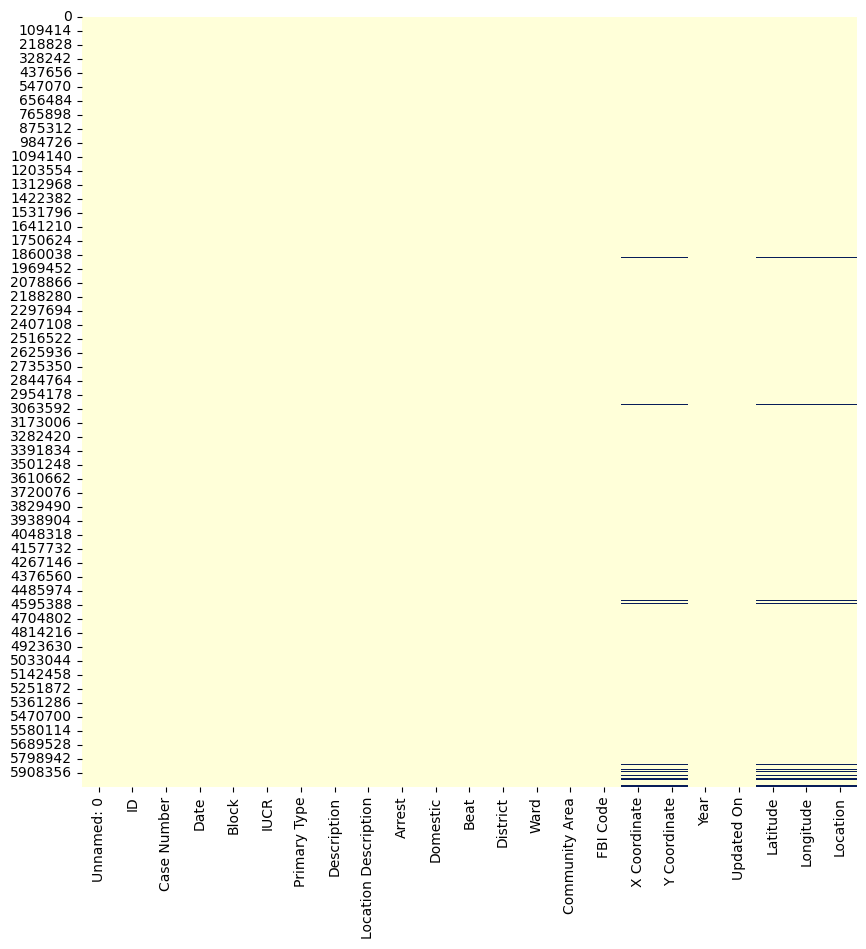

In [16]:
plt.figure(figsize=(10, 10))
sns.heatmap(chicago_df.isna(), cbar = False, cmap ='YlGnBu')

In [17]:
chicago_df.drop(columns=['Unnamed: 0', 'ID', 'Case Number', 'IUCR','FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location','Community Area', 'Beat', 'Ward', 'District'], inplace=True)

In [18]:
chicago_df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,01/08/2006 11:16:00 PM,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,02/17/2006 09:03:14 PM,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False


In [19]:
chicago_df.shape

(6017767, 7)

In [20]:
chicago_df.dtypes # Checking data types of the columns

Date                    object
Block                   object
Primary Type            object
Description             object
Location Description    object
Arrest                    bool
Domestic                  bool
dtype: object

In [21]:
chicago_df.Date = pd.to_datetime(chicago_df.Date, format = '%m/%d/%Y %I:%M:%S %p' ) #Converting date column to datetime

In [22]:
chicago_df.set_index('Date', inplace=True) # setting Date as index

In [24]:
chicago_df.head(2)

,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,
2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False


<AxesSubplot:xlabel='Primary Type'>

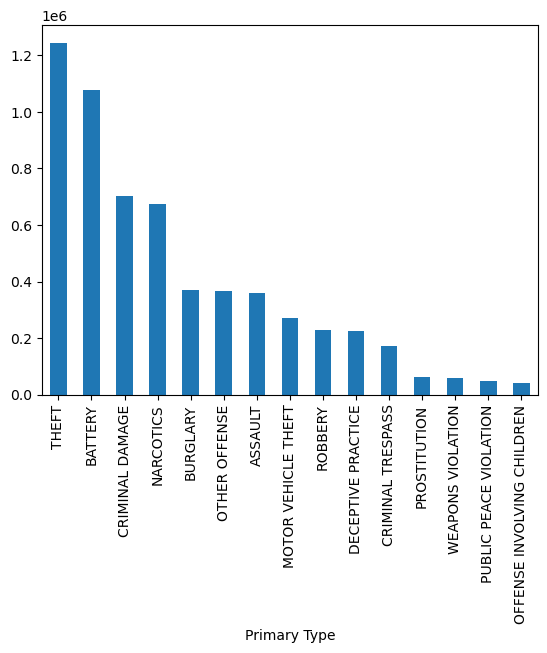

In [25]:
chicago_df['Primary Type'].value_counts()[:15].plot(kind = 'bar', )

In [62]:
# order_data = chicago_df['Primary Type'].value_counts().iloc[:15].index
# order_data

In [27]:
# df = chicago_df[~chicago_df.index.duplicated()]
# df.shape

In [28]:
# plt.figure(figsize=(15,10))
# sns.countplot(y ='Primary Type', data = chicago_df, order=order_data)

<AxesSubplot:xlabel='Arrest'>

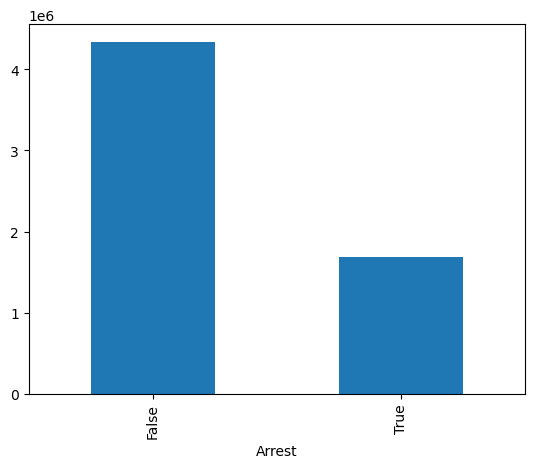

In [29]:
chicago_df.Arrest.value_counts().plot(kind = 'bar')

In [30]:
chicago_df['Location Description'].nunique()

161

In [31]:
top_10_crime_loc = chicago_df['Location Description'].value_counts().reset_index().sort_values(by = 'count', ascending=False)
top_10_crime_loc

,Location Description,count
0,STREET,1517724
1,RESIDENCE,991977
2,SIDEWALK,674793
3,APARTMENT,668298
4,OTHER,216154
...,...,...
144,LAUNDRY ROOM,1
143,PUBLIC HIGH SCHOOL,1
142,POOLROOM,1
140,GOVERNMENT BUILDING,1


In [32]:
# px.box(data_frame= chicago_df, x='Location Description')

In [33]:
# plt.figure(figsize=(15,10))
# sns.countplot(y='Location Description', data =chicago_df, order=chicago_df['Location Description'].value_counts().iloc[:15].index)

<AxesSubplot:xlabel='Location Description'>

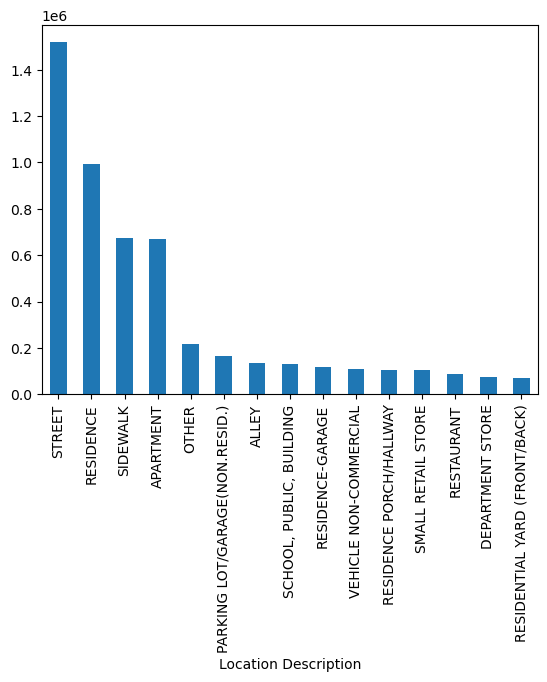

In [35]:
chicago_df['Location Description'].value_counts()[:15].plot(kind = 'bar')

<AxesSubplot:xlabel='Date'>

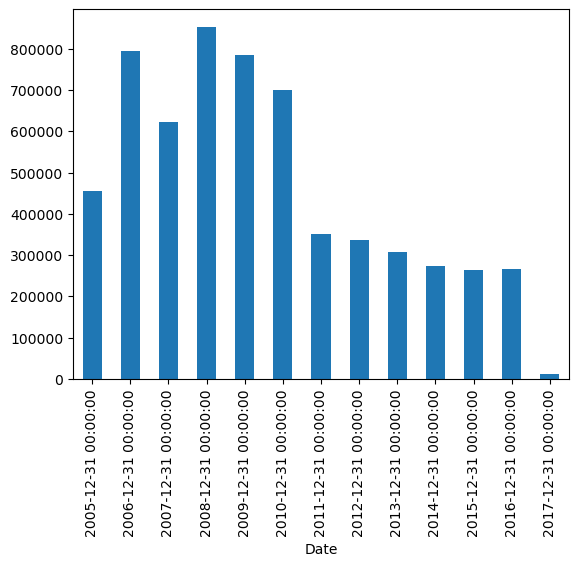

In [39]:
chicago_df.resample('Y').size().plot(kind = 'bar') # Resampling data into yearly occurence

<AxesSubplot:xlabel='Date'>

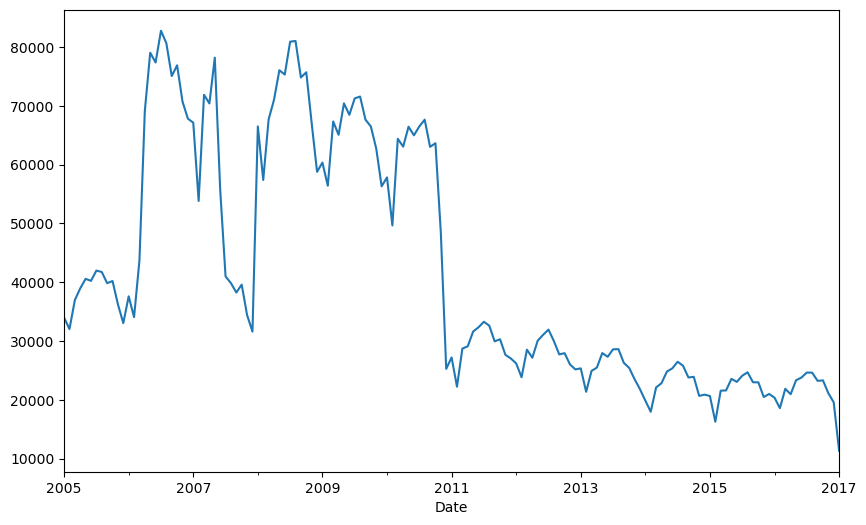

In [44]:
plt.figure(figsize=(10,6))
chicago_df.resample('M').size().plot() # Ploting monthly occurence of crime

<AxesSubplot:xlabel='Date'>

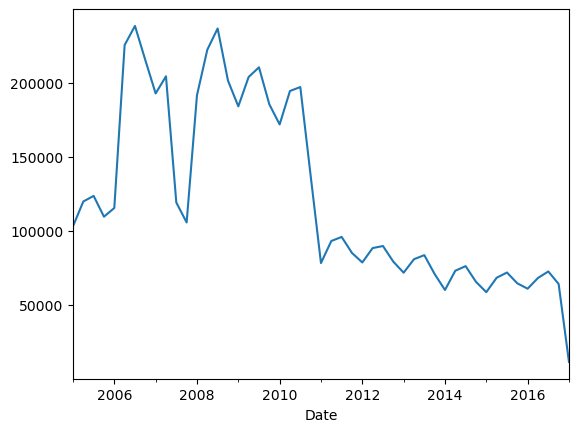

In [46]:
chicago_df.resample('Q').size().plot()

# Data for prophet

In [49]:
chicago_prophet = chicago_df.resample('M').size().reset_index().rename(columns={'Date':'ds', 0:'y'}) # Prophet takes a two column frame containing date(ds) and the count of events in the specified periods. 
chicago_prophet

,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


# Prophet

In [50]:
fbp = Prophet() #initializing prophet

In [51]:
fbp.fit(chicago_prophet) # fitting the model

11:56:23 - cmdstanpy - INFO - Chain [1] start processing
11:56:23 - cmdstanpy - INFO - Chain [1] done processing


In [53]:
# Making prediction for one year
future = fbp.make_future_dataframe(periods=365) # Creating a frame for predicted values
forcast = fbp.predict(future) # making prediction with the trained model into the created frame
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60455.329500,38899.746399,72305.276608,60455.329500,60455.329500,-4782.927136,-4782.927136,-4782.927136,-4782.927136,-4782.927136,-4782.927136,0.0,0.0,0.0,55672.402364
1,2005-02-28,60324.544550,32745.229311,66637.044313,60324.544550,60324.544550,-9463.483428,-9463.483428,-9463.483428,-9463.483428,-9463.483428,-9463.483428,0.0,0.0,0.0,50861.061122
2,2005-03-31,60179.746928,42938.287584,74942.731727,60179.746928,60179.746928,-1246.764640,-1246.764640,-1246.764640,-1246.764640,-1246.764640,-1246.764640,0.0,0.0,0.0,58932.982288
3,2005-04-30,60039.620196,44681.693297,78046.530072,60039.620196,60039.620196,1111.429663,1111.429663,1111.429663,1111.429663,1111.429663,1111.429663,0.0,0.0,0.0,61151.049859
4,2005-05-31,59894.822573,49163.735806,82945.389092,59894.822573,59894.822573,5386.559935,5386.559935,5386.559935,5386.559935,5386.559935,5386.559935,0.0,0.0,0.0,65281.382508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,2018-01-27,9656.534283,-10288.037897,23383.434065,9504.103671,9826.709598,-4094.868857,-4094.868857,-4094.868857,-4094.868857,-4094.868857,-4094.868857,0.0,0.0,0.0,5561.665426
506,2018-01-28,9643.198507,-10430.372703,22684.783367,9490.274994,9813.808612,-4237.127815,-4237.127815,-4237.127815,-4237.127815,-4237.127815,-4237.127815,0.0,0.0,0.0,5406.070692
507,2018-01-29,9629.862730,-11420.258387,22619.512856,9476.446317,9800.907627,-4391.658528,-4391.658528,-4391.658528,-4391.658528,-4391.658528,-4391.658528,0.0,0.0,0.0,5238.204202
508,2018-01-30,9616.526953,-11546.158138,22006.480001,9461.993095,9788.006641,-4558.195286,-4558.195286,-4558.195286,-4558.195286,-4558.195286,-4558.195286,0.0,0.0,0.0,5058.331667


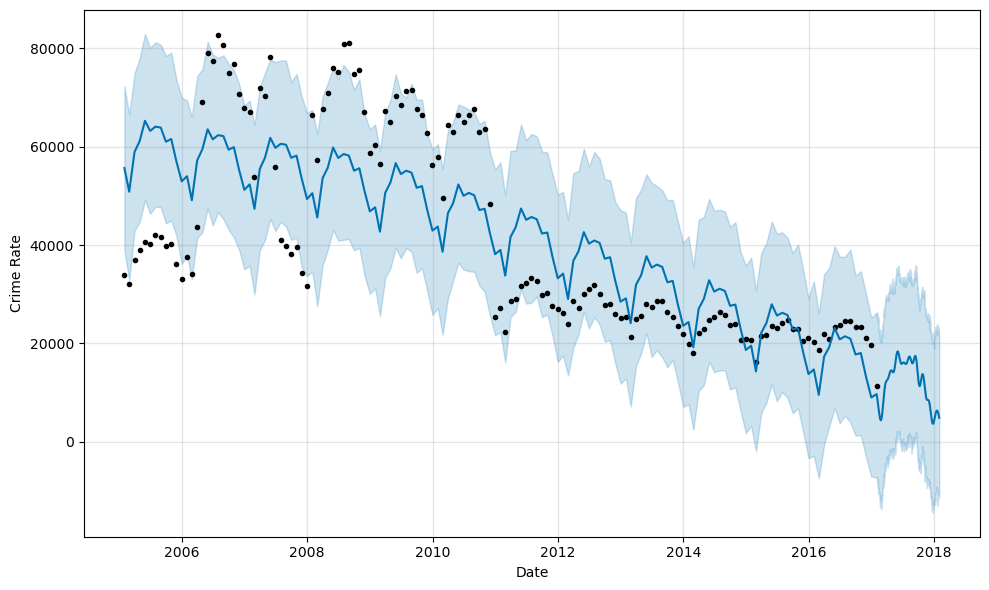

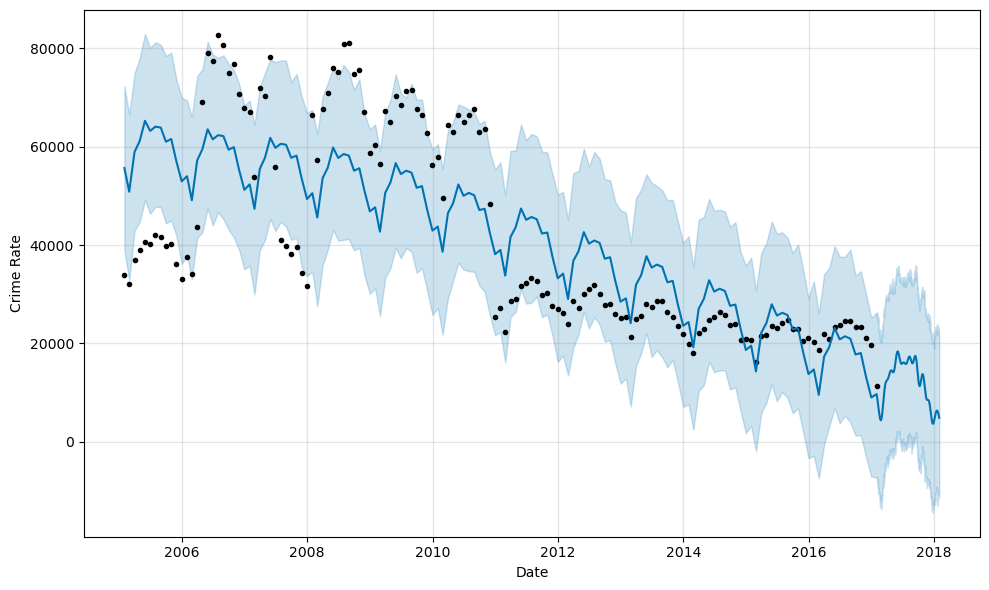

In [55]:
fbp.plot(forcast, xlabel='Date', ylabel='Crime Rate') # Ploting the forcasted values

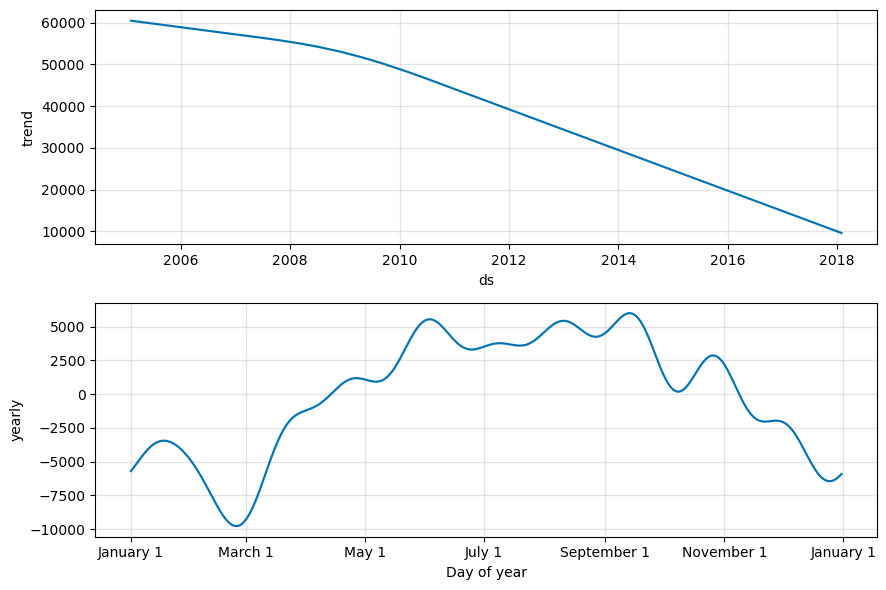

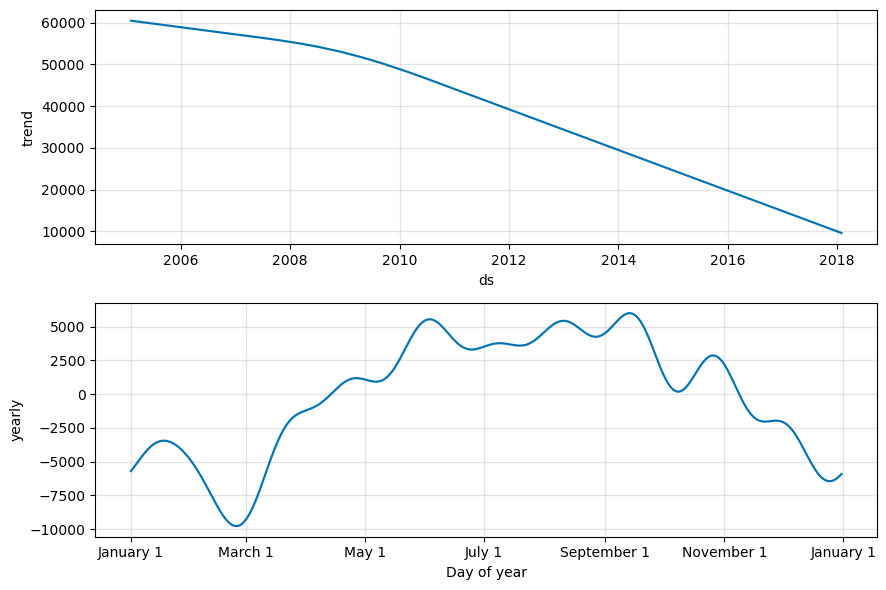

In [56]:
fbp.plot_components(forcast)

In [59]:
# Making prediction for two years
future = fbp.make_future_dataframe(periods=720) # Creating a frame for predicted values
forcast = fbp.predict(future) # making prediction with the trained model into the created frame
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60455.329500,37990.365338,73103.838970,60455.329500,60455.329500,-4782.927136,-4782.927136,-4782.927136,-4782.927136,-4782.927136,-4782.927136,0.0,0.0,0.0,55672.402364
1,2005-02-28,60324.544550,33945.686420,67444.223670,60324.544550,60324.544550,-9463.483428,-9463.483428,-9463.483428,-9463.483428,-9463.483428,-9463.483428,0.0,0.0,0.0,50861.061122
2,2005-03-31,60179.746928,42678.019821,76276.670464,60179.746928,60179.746928,-1246.764640,-1246.764640,-1246.764640,-1246.764640,-1246.764640,-1246.764640,0.0,0.0,0.0,58932.982288
3,2005-04-30,60039.620196,45070.764015,78117.801697,60039.620196,60039.620196,1111.429663,1111.429663,1111.429663,1111.429663,1111.429663,1111.429663,0.0,0.0,0.0,61151.049859
4,2005-05-31,59894.822573,48571.110779,81145.294104,59894.822573,59894.822573,5386.559935,5386.559935,5386.559935,5386.559935,5386.559935,5386.559935,0.0,0.0,0.0,65281.382508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,2019-01-17,4922.333568,-15630.356160,18456.821639,4470.384573,5360.691582,-3470.463742,-3470.463742,-3470.463742,-3470.463742,-3470.463742,-3470.463742,0.0,0.0,0.0,1451.869826
861,2019-01-18,4908.997791,-15037.595962,18220.539609,4456.503901,5348.476622,-3453.378366,-3453.378366,-3453.378366,-3453.378366,-3453.378366,-3453.378366,0.0,0.0,0.0,1455.619426
862,2019-01-19,4895.662015,-16060.790720,19262.638794,4442.623228,5336.112139,-3455.152560,-3455.152560,-3455.152560,-3455.152560,-3455.152560,-3455.152560,0.0,0.0,0.0,1440.509455
863,2019-01-20,4882.326238,-15077.535332,18198.281880,4428.742556,5323.747655,-3475.151898,-3475.151898,-3475.151898,-3475.151898,-3475.151898,-3475.151898,0.0,0.0,0.0,1407.174340


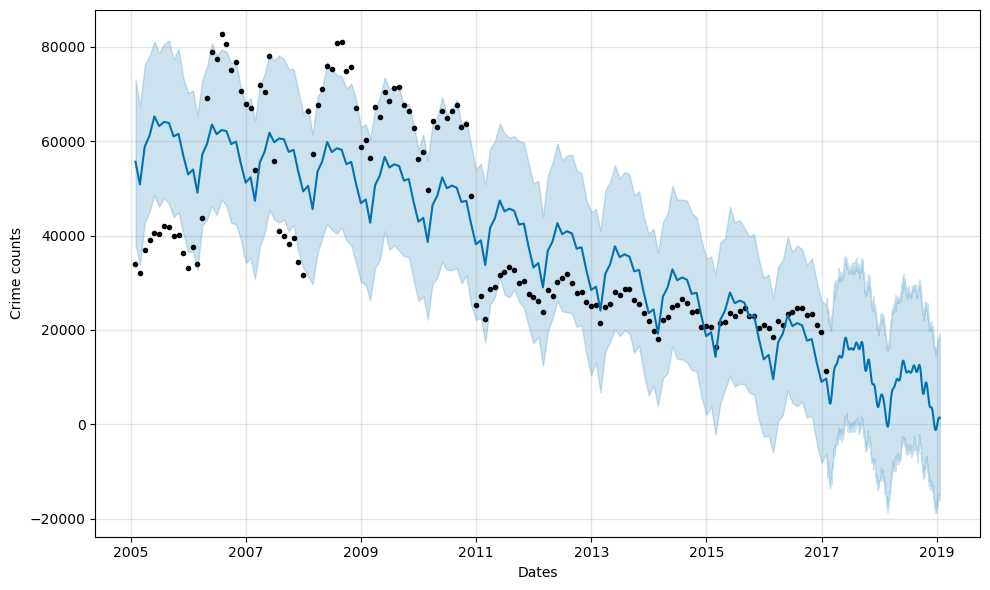

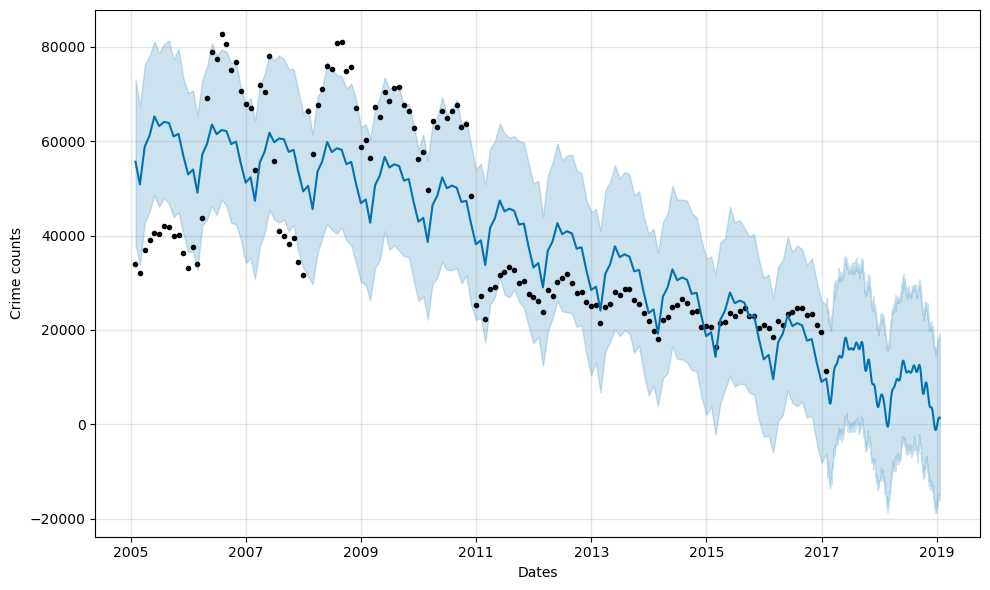

In [60]:
fbp.plot(forcast, xlabel='Dates', ylabel='Crime counts')

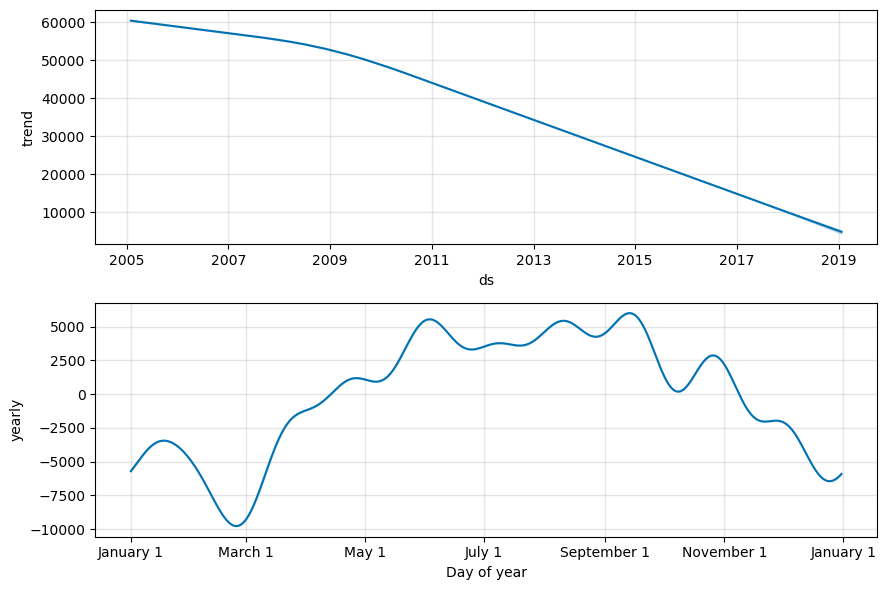

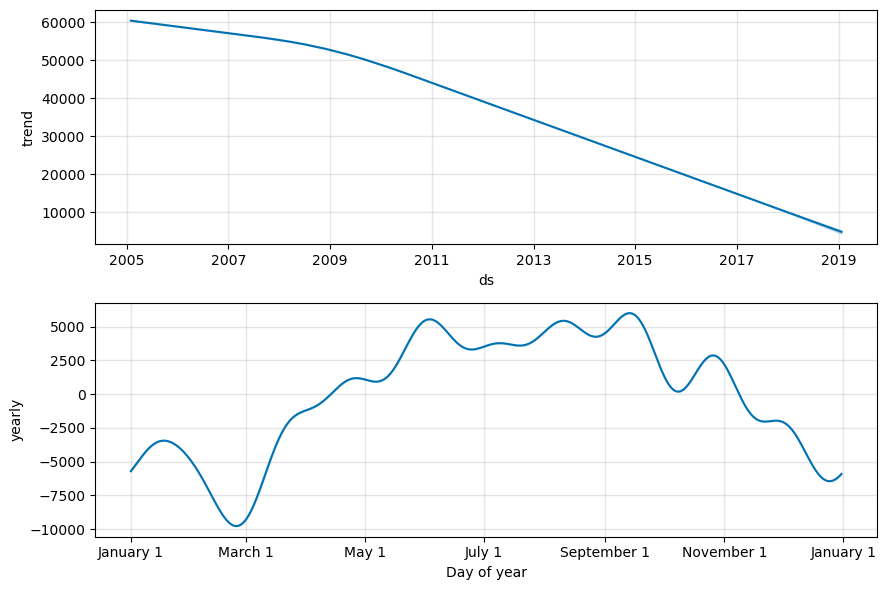

In [61]:
fbp.plot_components(forcast)